In [ ]:
!pip install fastf1

In [ ]:
import fastf1 as ff1
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

In [ ]:
# We load the session and select the desired data.
session = ff1.get_session(2023, 'Canada', 'Q')   #Q and R
session.load()

lap = session.laps.pick_fastest()
tel = lap.get_telemetry()

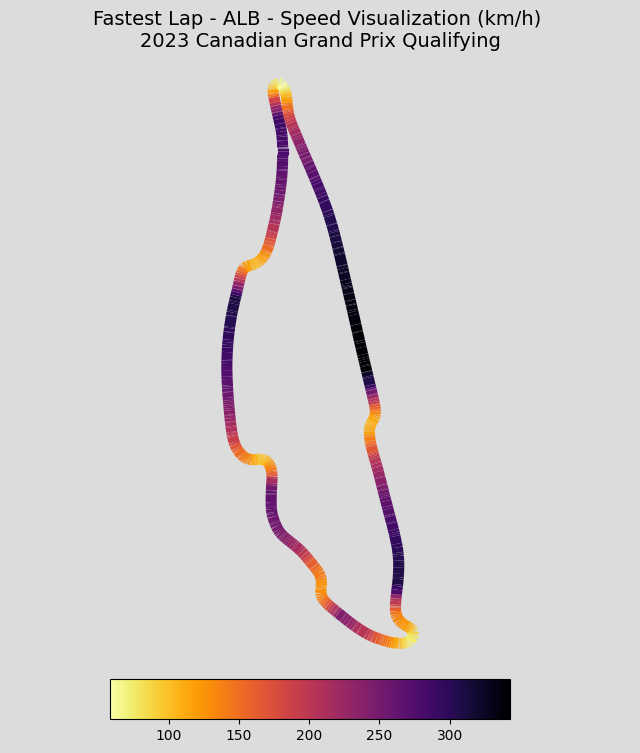

In [ ]:
# Where the car is at any moment in time ('x' n 'y' are columns in telemetry)
x = np.array(tel['X'].values)
y = np.array(tel['Y'].values)

# Now, we create a set of line segments so that we can color them individually
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
speed = tel['Speed'].to_numpy().astype(float)

# Create a figure
fig, ax = plt.subplots(figsize=(8, 8))
fig.patch.set_facecolor('gainsboro')

# Create a continuous norm to map from data points to colors
color = lap.telemetry['Speed']
colormap = mpl.cm.inferno.reversed()

lc = LineCollection(segments, norm=plt.Normalize(color.min(), color.max()), cmap=colormap, linewidth=8)
lc.set_array(speed)

# Add the LineCollection to the plot
ax.add_collection(lc)

# Title and axis settings
plt.title(f"Fastest Lap - {lap['Driver']} - Speed Visualization (km/h) \n"
          f"{session.event.year} {session.event['EventName']} {session.name}", size=14)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
plt.axis('off')

# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal")

plt.show()